# Implementation of Logistic Regression

In [22]:
# How to select LogisticRegression?

# Logistic Regression is best suited when dependent variable (Y) is binary
# Type of dependent variable (Y): Binary - True or False/lived or died/Yes or not/0 or 1

In [70]:
# Steps involved in implementing LogisticRegression using scikit-learn workflow:


# 0) Each model in scikit-learn is implemented as a separate class
# and the first step is to identify the class we want to create an instance of.
# In our case, we want to use the LogisticRegression class.

# 1) Instantiate (or create) the LogisticRegression machine learning model
# 2) Fit (train) the model to the training data
# 3) Use the model to make predictions
# 4) Evaluate the accuracy of the predictions

In [50]:
# Jupyter notebook config detials:

# To better display the data, styling ipython notebook
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

# To improve viewablity of dataframe configuring to show 20 columns and increasing the width of each column
pd.set_option('max_columns', 20)
pd.set_option('max_colwidth', 5000)

## Step 0

In [25]:
# Analyse Data and identify which model is required to be used

import pandas as pd

In [39]:
# Matplotlib for additional customization
from matplotlib import pyplot as plt

# In Jupyter Notebook, "%matplotlib inline" can be used to display plots inside the notebook.
%matplotlib inline  


In [44]:
# The training set to build the machine learning model.
train = pd.read_csv('train.csv')
train.head()

# Along with train data, test data is also required.
# Difference between train data and test data is that 
# train data will have value for dependent variable and test data won't

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
# In above dataset, 'Survived' is the dependent variable (Y) and
# the model once built needs to be predict it for the new data.

train['Survived'].unique()

array([0, 1])

In [30]:
# Survived is of binary type (value: 0- died and 1-survived). Thus we can safely use Logistic Regression

In [ ]:
# To feed data to the ML model, it needs to be cleaned and prepared.
# Most models can't processes text or image, so independent variable needs to be converted into convert into numbers.

In [ ]:
# Cleaning/Preparing data
# The pandas.cut() function has two required parameters:
# - the column we wish to cut, and
# - a list of numbers which define the boundaries of our cuts.

# Other optional paramter used here 
# - labels, which takes a list of labels for the resultant bins. 

In [ ]:
# Creating class for age group

#Missing, from -1 to 0
#Infant, from 0 to 5
#Child, from 5 to 12
#Teenager, from 12 to 19
#Young Adult, from 19 to 35
#Adult, from 35 to 60
#Senior, from 60 to 100
# ["Missing", 'Infant', "Child", 'Teenager', "Young Adult", 'Adult', 'Senior']

In [45]:
def process_age(df,cut_points,label_names):
    df["Age"] = df["Age"].fillna(-0.5)
    df["AgeCategories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

cut_points = [-1,0, 5, 12, 19, 35, 60, 100]
label_names = ["Missing", 'Infant', "Child", 'Teenager', "Young Adult", 'Adult', 'Senior']

train = process_age(train,cut_points,label_names)


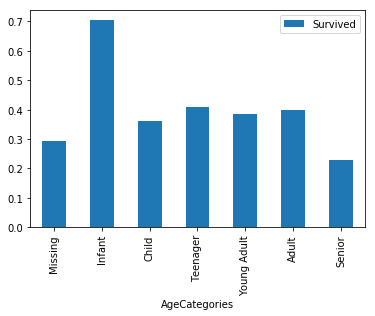

In [46]:
# Showing in chart, % of people survived for different age groups
age_cat_pivot = train.pivot_table(index="AgeCategories",values="Survived")
age_cat_pivot.plot.bar()
plt.show()

In [32]:
# Using pandas.create_dummies() function to create dummy columns.
# Here Pclass, Sex, Age would be fed into model and they would be prepared with this function.
# Other independent variables which might be useful are Cabin and Embarked but are not used here in the example. 

In [47]:
# pd.get_dummies convert categorical variable into dummy/indicator variables

# Example, here input column Sex has values as male and female
# pd.get_dummies takes the column as input and creates two new columns male & female
# each having a value of 1 when a record has respective value i.e. male/female.

def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df


In [49]:
train = create_dummies(train,"Pclass")
train = create_dummies(train,"Sex")
train = create_dummies(train,"AgeCategories")

# Normally test data would also be prepared at same time.

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Pclass_3,Sex_female,Sex_male,AgeCategories_Missing,AgeCategories_Infant,AgeCategories_Child,AgeCategories_Teenager,AgeCategories_Young Adult,AgeCategories_Adult,AgeCategories_Senior
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,1,0,1,0,0,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,...,0,1,0,0,0,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,1,1,0,0,0,0,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,1,0,0,0,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,1,0,1,0,0,0,0,1,0,0


## Step 1 -  Instantiate (or create) the LogisticRegression machine learning model


In [85]:
# Importing LogisticRegression model from same namesake class
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
import numpy as np


In [62]:
# Creating Logistic regression object
lr = LogisticRegression(solver='lbfgs')

## Step 2 - Fit (train) the model to the training data

In [63]:


# Using LogisticRegression.fit() to fit (train) the model to the training data

columns = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'AgeCategories_Missing','AgeCategories_Infant',
       'AgeCategories_Child', 'AgeCategories_Teenager',
       'AgeCategories_Young Adult', 'AgeCategories_Adult',
       'AgeCategories_Senior']


# Use LogisticRegression.fit() to fit (or trains) the model on the train dataset using:
#  - The columns contained in columns as the first (X) parameter.
#  - The Survived column as the second (y) parameter.

lr.fit(train[columns], train['Survived'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

## Step 2A - Splitting data into groups to improve accuracy

In [64]:
# There is only one dataset with survived information (actual prediction) to train and test the model.
# - Same data if used for train and test will cause the issue of overfitting i.e.
# prediction will be accurate for the provided data but will fair poorly for new data.
# To avoid overfitting, separate train and test data is used

# Here train data can be split into two parts:
# - One part to train our model on (often 80% of the observations)
# - Another part to make predictions with and test our model (often 20% of the observations)

# The convention in machine learning is to call these two parts train and test. 

In [65]:
# Will use model_selection.train_test_split() function from scikit-learn library
# to split our data.

# train_test_split() accepts two parameters:
# - X and y, which contain all the data we want to train and test on, and
# - test_size=0.2,lets us control what proportions our data are split into. Here 20% of data is used for test.
# - random_state=0 helps to reproduce the result.

# Returns four objects:
# - Train data i.e. train_X, test_X (80% data), and  
# - Test data i.e. train_y, test_y (20% data)

In [66]:
# train_test_split has already been imported from sklearn.model_selection

all_X = train[columns]
all_y = train['Survived']

train_X, test_X, train_y, test_y = train_test_split(
    all_X, all_y, test_size=0.2,random_state=0)

In [67]:
train_X.shape

(712, 17)

## Step 3 - Use the model to make predictions

In [ ]:
# As we have fittted (trained) our model, we can use the LogisticRegression.predict() method to make predictions.

In [68]:
lr = LogisticRegression(solver='lbfgs')
lr.fit(train_X, train_y)
predictions = lr.predict(test_X)

In [69]:
predictions

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0])

## Step 4 - Evaluate the accuracy of the predictions

In [77]:
# scikit-learn has a handy function we can use to calculate accuracy:
# A) accuracy_score()
# B) confusion_matrix()

In [78]:

# metrics.accuracy_score()

# The function accepts two parameters, y_true and y_pred,
# which are the actual values and our predicted values respectively, and returns our accuracy score.

In [73]:
# accuracy_score function from sklearn.metrics has already been imported

accuracy = accuracy_score(test_y, predictions)
accuracy

0.7988826815642458

In [79]:
# confusion_matrix function from sklearn.metrics has already been imported

conf_matrix = confusion_matrix(test_y, predictions)
pd.DataFrame(conf_matrix, columns=['Survived', 'Died'], index=[['Survived', 'Died']])

,Survived,Died
Survived,94,16
Died,20,49


In [80]:
# Extra

In [81]:
# Given the data set used is quite small, there is a good chance that our model is overfitting,
# and will not perform as well on totally unseen data.

# Useing a technique called cross validation to train and test our model on
# different splits of our data, and then average the accuracy scores.

In [82]:
# Most common form of cross validation, and the one we will be using, is called k-fold cross validation

In [83]:
# 'Fold' refers to each different iteration that we train our model on, and 'k' just refers to the number of folds

# We will use scikit-learn's model_selection.cross_val_score() function to automate the process.
# The basic syntax for cross_val_score() is:

# cross_val_score(estimator, X, y, cv=None)

# estimator is a scikit-learn estimator object, like the LogisticRegression() objects we have been creating.
# X is all features from our data set.
# y is the target variables.
# cv specifies the number of folds.


In [86]:
lr = LogisticRegression(solver='lbfgs')
scores = cross_val_score(lr, all_X, all_y, cv=10)
np.mean(scores)

0.8024670865963002